In [1]:
'''
    importing libraries
    pandas: for data manipulation
    matplotlib: to plot graphs
'''

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data using pandas

households_and_families = pd.read_csv('households_and_families.csv')
internet_subscription = pd.read_csv('internet_subscription.csv')

In [3]:
# replacing the columns name with first row data for both dataset

households_and_families.columns = households_and_families.loc[0,:] # replace the columns
households_and_families = households_and_families.drop([0])  # drop the 1st row
internet_subscription.columns = internet_subscription.loc[0,:]  # replace the columns
internet_subscription = internet_subscription.drop([0]) # drop the 1st row

In [4]:
# creating a dictionary to keep important columns and rename columns

required_columns = {
        'id':'id',
        'Geographic Area Name':'State',
        'Estimate!!Total!!Total population in households':'Total Population',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households':'Total Population with no Internet & Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone':'White Alone,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone':'Black or African American Alone,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone':'American Indian and Alaska Native Alone,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone':'Asian Alone,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone':'Native Hawaiian and Other Pacific Islander Alone,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone':'Some Other Race Alone,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races':'Two or more races,Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race)':'Hispanic or Latino origin (of any race),Computer',
        'Estimate!!Without an Internet Subscription!!With a computer!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino':'White alone, not Hispanic or Latino,Computer',
        'Estimate!!No computer in household!!Total population in households':'Total Population with No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone':'White Alone,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone':'Black or African American Alone,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone':'American Indian and Alaska Native Alone,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone':'Asian Alone,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone':'Native Hawaiian and Other Pacific Islander Alone,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone':'Some Other Race Alone,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races':'Two or more races,No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race)':'Hispanic or Latino origin (of any race),No Computer',
        'Estimate!!No computer in household!!Total population in households!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino':'White alone, not Hispanic or Latino,No Computer',
}

In [5]:
internet_subscription = internet_subscription[required_columns.keys()]  #keeping specific columns, above mentioned columns

In [6]:
internet_subscription = internet_subscription.rename(columns=required_columns,inplace = False) # renaming the columns

In [7]:
internet_subscription.head()  # show top 5 rows

,id,State,Total Population,Total Population with no Internet & Computer,"White Alone,Computer","Black or African American Alone,Computer","American Indian and Alaska Native Alone,Computer","Asian Alone,Computer","Native Hawaiian and Other Pacific Islander Alone,Computer","Some Other Race Alone,Computer",...,Total Population with No Computer,"White Alone,No Computer","Black or African American Alone,No Computer","American Indian and Alaska Native Alone,No Computer","Asian Alone,No Computer","Native Hawaiian and Other Pacific Islander Alone,No Computer","Some Other Race Alone,No Computer","Two or more races,No Computer","Hispanic or Latino origin (of any race),No Computer","White alone, not Hispanic or Latino,No Computer"
1,0400000US01,Alabama,4786560,370534,205730,144541,1227,2038,N,10164,...,327928,184415,125933,2436,1413,N,9092,4547,15256,178234
2,0400000US02,Alaska,704872,45853,23380,N,13598,1459,N,N,...,19104,9422,N,8624,513,N,N,412,376,9275
3,0400000US04,Arizona,7116824,517623,379506,28853,57689,7187,2695,28370,...,262351,177518,10443,58744,1934,45,8028,5639,84154,107304
4,0400000US05,Arkansas,2933793,260073,192968,37478,1290,3765,1894,12892,...,202937,138235,50308,1242,750,3345,4719,4338,12973,130816
5,0400000US06,California,38685702,1921392,1096366,142385,24513,169481,8621,416027,...,1102912,685902,107445,15896,109728,5197,153878,24866,471659,391215


In [8]:
# function created to clean the data, like convertig string to int, removing irrelavnt data column wise

def clean_columns(internet_subscription,column):
    clean = []
    for i in internet_subscription[column]:
        if i!='N':
            i = int(i)
        if isinstance(i,int):
            clean.append(i)
        else:
            clean.append(None)
    
    internet_subscription[column] = clean
    return internet_subscription

In [9]:
# calling the clean_column function to clean each column

for col in list(internet_subscription.columns)[2:]:
    internet_subscription = clean_columns(internet_subscription,col)

In [10]:
internet_subscription.head()

,id,State,Total Population,Total Population with no Internet & Computer,"White Alone,Computer","Black or African American Alone,Computer","American Indian and Alaska Native Alone,Computer","Asian Alone,Computer","Native Hawaiian and Other Pacific Islander Alone,Computer","Some Other Race Alone,Computer",...,Total Population with No Computer,"White Alone,No Computer","Black or African American Alone,No Computer","American Indian and Alaska Native Alone,No Computer","Asian Alone,No Computer","Native Hawaiian and Other Pacific Islander Alone,No Computer","Some Other Race Alone,No Computer","Two or more races,No Computer","Hispanic or Latino origin (of any race),No Computer","White alone, not Hispanic or Latino,No Computer"
1,0400000US01,Alabama,4786560,370534,205730,144541.0,1227.0,2038.0,NaN,10164.0,...,327928,184415,125933.0,2436.0,1413.0,NaN,9092.0,4547.0,15256,178234
2,0400000US02,Alaska,704872,45853,23380,NaN,13598.0,1459.0,NaN,NaN,...,19104,9422,NaN,8624.0,513.0,NaN,NaN,412.0,376,9275
3,0400000US04,Arizona,7116824,517623,379506,28853.0,57689.0,7187.0,2695.0,28370.0,...,262351,177518,10443.0,58744.0,1934.0,45.0,8028.0,5639.0,84154,107304
4,0400000US05,Arkansas,2933793,260073,192968,37478.0,1290.0,3765.0,1894.0,12892.0,...,202937,138235,50308.0,1242.0,750.0,3345.0,4719.0,4338.0,12973,130816
5,0400000US06,California,38685702,1921392,1096366,142385.0,24513.0,169481.0,8621.0,416027.0,...,1102912,685902,107445.0,15896.0,109728.0,5197.0,153878.0,24866.0,471659,391215


In [11]:
# printing all population of each races with no computer or no internet


def print_population_race_wise(internet_subscription):
    analysis = {}
    for col in internet_subscription.columns[4:]:
        if 'Total' not in col:
            analysis[col] = internet_subscription[col].sum()
    return analysis

analysis = print_population_race_wise(internet_subscription)

for i in analysis:
    print('Population of {} is {}'.format(i,analysis[i]))
    print()

Population of White Alone,Computer is 12815141

Population of Black or African American Alone,Computer is 3780847.0

Population of American Indian and Alaska Native Alone,Computer is 327850.0

Population of Asian Alone,Computer is 578578.0

Population of Native Hawaiian and Other Pacific Islander Alone,Computer is 32849.0

Population of Some Other Race Alone,Computer is 1479851.0

Population of Two or more races,Computer is 522118.0

Population of Hispanic or Latino origin (of any race),Computer is 5186041

Population of White alone, not Hispanic or Latino,Computer is 9395925

Population of White Alone,No Computer is 10269715

Population of Black or African American Alone,No Computer is 2741954.0

Population of American Indian and Alaska Native Alone,No Computer is 272950.0

Population of Asian Alone,No Computer is 322345.0

Population of Native Hawaiian and Other Pacific Islander Alone,No Computer is 26486.0

Population of Some Other Race Alone,No Computer is 720524.0

Population of T

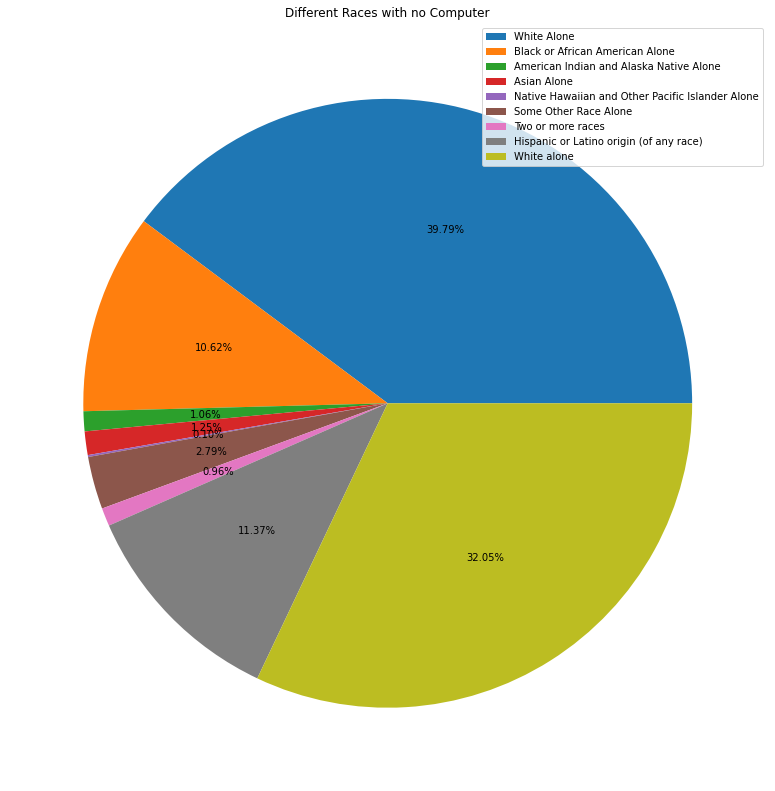

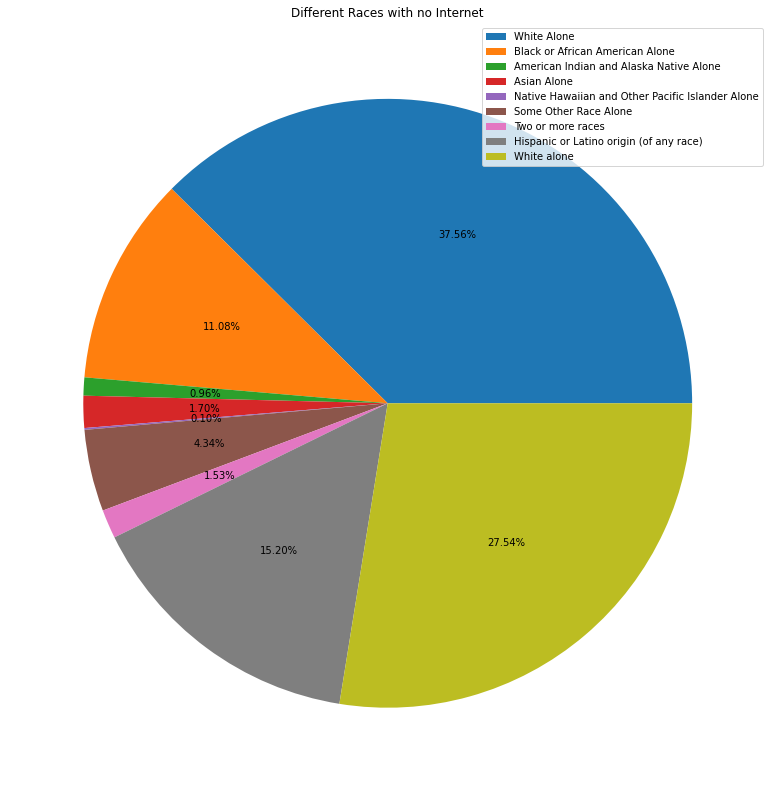

In [12]:
# Plotting the Pie chart of Population with no internet or no computer


def plot_graphs(analysis):
    labels = [i.split(',')[0] for i in analysis if 'No Computer' in i]
    data = [analysis[i] for i in analysis if 'No Computer' in i]
    
    fig = plt.figure(figsize =(20, 14))
    plt.pie(data,autopct='%1.2f%%')
    plt.legend(labels = labels,loc="upper right")
    plt.title('Different Races with no Computer')
    plt.show()
    
    labels = [i.split(',')[0] for i in analysis if 'No Computer' not in i]
    data = [analysis[i] for i in analysis if 'No Computer' not in i]
    
    fig = plt.figure(figsize =(20, 14))
    plt.pie(data,autopct='%1.2f%%')
    plt.legend(labels = labels,loc="upper right")
    plt.title('Different Races with no Internet')
    plt.show()
 
plot_graphs(analysis)

In [13]:
# clen the household data

households_and_families= clean_columns(households_and_families,'Estimate!!Total!!HOUSEHOLDS!!Total households')
total_household = households_and_families['Estimate!!Total!!HOUSEHOLDS!!Total households'].sum()

In [14]:
# calculate the household of the population who don't use internet or computer

def calculate_household(households_and_families,internet_subscription):
    total_household = households_and_families['Estimate!!Total!!HOUSEHOLDS!!Total households'].sum()
    total_population = internet_subscription['Total Population'].sum()
    no_internet_population = internet_subscription['Total Population with no Internet & Computer'].sum() + internet_subscription['Total Population with No Computer'].sum()
    result = (no_internet_population/total_population)*total_household
    print('{} households are those who either does not have computer or internet'.format(int(result)))

calculate_household(households_and_families,internet_subscription)

13107461 households are those who either does not have computer or internet


In [ ]:
# Finding top 5 states with less

internet_subscription['Total'] = (internet_subscription['Total Population with no Internet & Computer'] + internet_subscription['Total Population with No Computer']
internet_subscription = internet_subscription.sort_values(by = 'Total', ascending=False)
internet_subscription.head()